In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [63]:
def get_files(path):
    return [join(path, f) for f in listdir(path) if isfile(join(path, f))]

In [64]:
img_list = get_files("../misaligned_images/")

## Testing with one image

In [65]:
#Read the image, do binary processing
img = cv2.imread(img_list[7])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#The pixels are reversed to white and black
# gray = cv.bitwise_not(gray)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)


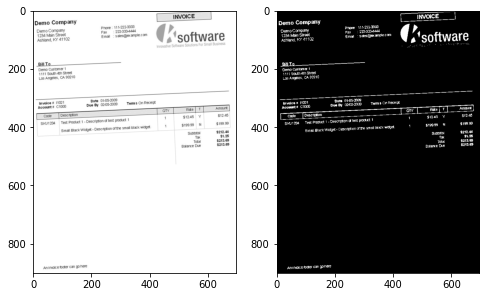

In [66]:
ax1, ax2 = plt.figure(figsize=(8,8)).subplots(1, 2)
ax1.imshow(gray,cmap='gray')
ax2.imshow(thresh,cmap='gray')

In [67]:
#Calculates the minimum border that contains rotated text
coords = np.column_stack(np.where(thresh > 0))
print(coords)

#This function gives the rectangle border containing the whole text area, and the rotation angle of this border is the same as that of the text in the figure
angle = cv2.minAreaRect(coords)[-1]
print(angle)

#Adjust the angle
if angle < -45:
    angle = -(90+ angle)
else:
    angle = -angle
    
print(angle)

[[  4 595]
 [  4 596]
 [  4 597]
 ...
 [887  35]
 [887  36]
 [887  44]]
2.602562189102173
-2.602562189102173


In [68]:
#Affine transformation
h, w = img.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
cv2.putText(rotated, 
            'Angle: {:.2f} degrees'.format(angle), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

print('[INFO] angel :{:.3f}'.format(angle))

[INFO] angel :-2.603


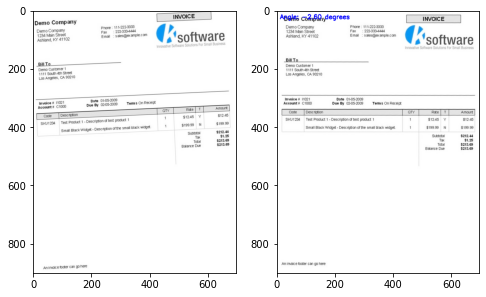

In [69]:
ax1, ax2 = plt.figure(figsize=(8,8)).subplots(1, 2)
ax1.imshow(img,cmap='gray')
ax2.imshow(rotated,cmap='gray')

## Writing function for all images

In [79]:
def image_aliner(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    angle = -(90+ angle) if angle < -45 else -angle
    
    #Affine transformation
    h, w = img.shape[:2]
    center = (w//2, h//2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    cv2.putText(rotated, 
                'Angle: {:.2f} degrees'.format(angle),
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                0.7, (0, 0, 255), 2
               )
    print('{} rotated to {} degrees'.format(image_path.split('/')[-1],angle))
    return rotated

In [88]:
for each in img_list:
    result = image_aliner(each)
    cv2.imwrite('aligned_image/' + each.split('/')[-1],result)

2.jpg rotated to -1.7977080345153809 degrees
9.jpg rotated to -90.0 degrees
7.jpg rotated to -88.33235931396484 degrees
12.png rotated to -89.08415985107422 degrees
1.jpg rotated to -88.52489471435547 degrees
6.jpg rotated to -0.5778608322143555 degrees
4.jpg rotated to -0.3262358009815216 degrees
8.jpg rotated to -2.602562189102173 degrees
3.jpg rotated to -0.0 degrees
10.jpg rotated to -88.53119659423828 degrees
13.jpg rotated to -87.80162811279297 degrees
11.jpg rotated to -3.684413433074951 degrees
5.jpg rotated to -88.8002700805664 degrees
